In [2]:
#importing
import math
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Black-Scholes option pricing

In [3]:
#stock
#current price
S = 100
#Strike price
K = 99

#interest
r = 0.06

#volatility 
sigma = 0.20

#time to maturity (in years)
T = 1

#defining d1 and d2
def d1(S,K,T,r,sigma):
    return(np.log(S/K)+(r+sigma**2/2)*T)/sigma*np.sqrt(T)
def d2(S,K,T,r,sigma):
    return d1(S,K,T,r,sigma)-sigma*np.sqrt(T)

#Black-Scholes
def Call(S, K, T, r, sigma):
    return S*norm.cdf(d1(S,K,T,r,sigma))-K*np.exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma))


#hedge parameter
delta_t = norm.cdf(d1(S,K,T,r,sigma))


print("d1 = " , d1(S,K,T,r,sigma))
print("d2 = ", d2(S,K,T,r,sigma))
print("option price = ", Call(S, K, T, r, sigma))
print("hedge parameter = ", delta_t)


d1 =  0.4502516792675075
d2 =  0.25025167926750747
option price =  11.544280227051097
hedge parameter =  0.6737355117348961


# Settting up stock paths

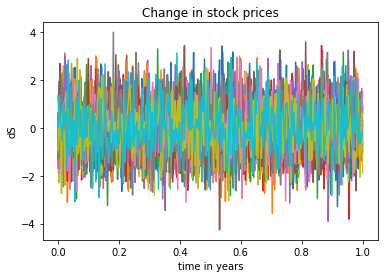

In [4]:
#timesteps to maturity
nsteps = 365
timesteps = np.linspace(0, T, nsteps)
y = []
dt = T/nsteps

for x in range(20):
    y.append([])
    for i in range(nsteps):
        z = np.random.normal(0, 1)
        dZ = z*np.sqrt(dt)
        dS = r*S*dt + sigma*S*dZ
        y[x].append(dS)

plt.figure()
for i in range(20):
    plt.plot(timesteps, y[i])

plt.title("Change in stock prices")    
plt.xlabel("time in years")
plt.ylabel("dS")
plt.show()

15.051748892656349


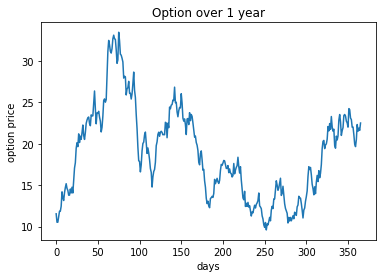

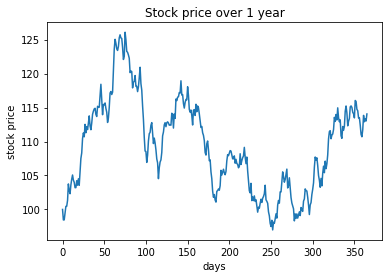

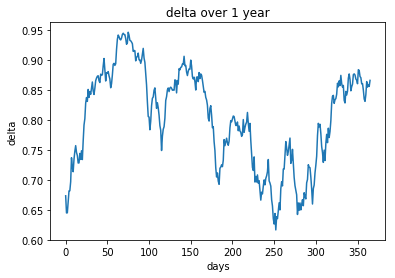

In [58]:
#stock dynamics

def stockprices(S, r, sigma, dt):
    dZ = np.random.normal(0, 1)*np.sqrt(dt)        
    return S + r*S*dt + sigma*S*dZ

#inputs
S0 = 100
r = 0.06
sigma = 0.2
sigma_stock = 0.2
T = 1
N = 365
prices = [S0]
deltas = []
hedge = []
option_price = []

for i in range(N):
    prices.append(stockprices(prices[-1], r, sigma, T/N))

    
for x in prices:
    deltas.append(d1(x,K,T,r,sigma_stock))
    option_price.append(Call(x, K, T, r, sigma))

for x in deltas:
    hedge.append(norm.cdf(x))

plt.figure()
plt.plot(option_price)
plt.title("Option over 1 year")
plt.xlabel("days")
plt.ylabel("option price")
    
plt.figure()
plt.plot(prices)
plt.title("Stock price over 1 year")
plt.xlabel("days")
plt.ylabel("stock price")

plt.figure()
plt.title("delta over 1 year")
plt.xlabel("days")
plt.ylabel("delta")
plt.plot(hedge)


payoff = max(prices[-1] - K, 0)

print(payoff)

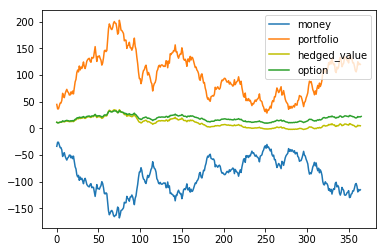

In [59]:
money = []
portfolio = []
hedged_value = []

for i in range(N):
    if i==0:
        money.append(Call(S, K, T, r, sigma) - deltas[0]*prices[0])
        portfolio.append(deltas[0]*prices[0])
        hedged_value.append(portfolio[0] + money[0])
    else:
        money.append(money[i-1]*(1+r)**(1/N) - (deltas[i] - deltas[i-1])*prices[i])
        portfolio.append(deltas[i]*prices[i])
        hedged_value.append(portfolio[i] + money[i])
        

plt.figure()
plt.plot(money, label='money')
plt.plot(portfolio, label='portfolio')
plt.plot(hedged_value, label='hedged_value', c='y')
plt.plot(option_price, label='option')
plt.legend()